In [147]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
df = pd.read_csv('dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6627 entries, 0 to 6626
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6627 non-null   int64  
 1   severity                6627 non-null   int64  
 2   dtp_cat                 6627 non-null   object 
 3   dead_count              6627 non-null   int64  
 4   injured_count           6627 non-null   int64  
 5   participants            6627 non-null   int64  
 6   peop_in_car             6627 non-null   int64  
 7   veh_category            6627 non-null   int64  
 8   participant_violations  4194 non-null   object 
 9   region                  6627 non-null   object 
 10  address                 6409 non-null   object 
 11  exp                     6399 non-null   float64
 12  child                   6627 non-null   int64  
 13  pedestr                 6627 non-null   int64  
 14  bump                    6627 non-null   

In [148]:
# Удаление бесполезных столбцов
irrelavant_columns = ['id', 'dtp_cat', 'dead_count','injured_count', 'participants', 'participant_violations', 'region', 'address', 'pickup_cluster']
df_irrelavant_drop = df.drop(irrelavant_columns, axis=1)
del df

# Замена пустых значений - NaN
df_irrelavant_drop.replace("", float("NaN"), inplace=True)
df_irrelavant_drop.replace(" ", float("NaN"), inplace=True)

# Подсчет % пустых значений
count_missing_value = df_irrelavant_drop.isna().sum() / df_irrelavant_drop.shape[0] * 100
count_missing_value_df = pd.DataFrame(count_missing_value.sort_values(ascending=False), columns=['Пропущено%'])

missing_value_df = count_missing_value_df[count_missing_value_df['Пропущено%'] > 0]

missing_value_df

,Пропущено%
exp,3.440471
vehicle_age,0.150898


In [149]:
del missing_value_df

# Удаление столбцов, где % пропущенных значений превышает 40%
missing_value_40_df = count_missing_value_df[count_missing_value_df['Пропущено%'] > 40]
df_irrelavant_drop.drop(missing_value_40_df.index, axis=1, inplace=True)

del count_missing_value_df
missing_value_40_df

,Пропущено%


In [150]:
data_preprocessed_mean_df, data_preprocessed_median_df = df_irrelavant_drop.copy(), df_irrelavant_drop.copy()
del df_irrelavant_drop

# Разделение столбцов на категории
numerical_missing = ['exp', 'vehicle_age', 'veh_category']

In [151]:
# Замена средним
for column_name in numerical_missing:
    data_preprocessed_mean_df[column_name] = data_preprocessed_mean_df.groupby('severity')[column_name].transform(lambda x:x.fillna(x.mean()))

In [152]:
df_convert_data = data_preprocessed_mean_df.copy()
del data_preprocessed_mean_df

# Удаление строк с пустыми значениям
data_preprocessed_dropNaN_df = df_convert_data.dropna()
data_preprocessed_dropNaN_df.reset_index(drop=True, inplace=True)

data_df_has_nulls = df_convert_data.isnull().any().any()
has_nulls = data_preprocessed_dropNaN_df.isnull().any().any()
print('Есть ли пустые значения в оригинальном df:', data_df_has_nulls)
print('Есть ли пустые значения в data_preprocessed_dropNaN_df:', has_nulls)

Есть ли пустые значения в оригинальном df: False
Есть ли пустые значения в data_preprocessed_dropNaN_df: False


In [153]:
data_e = data_preprocessed_dropNaN_df.copy()

<Axes: xlabel='severity'>

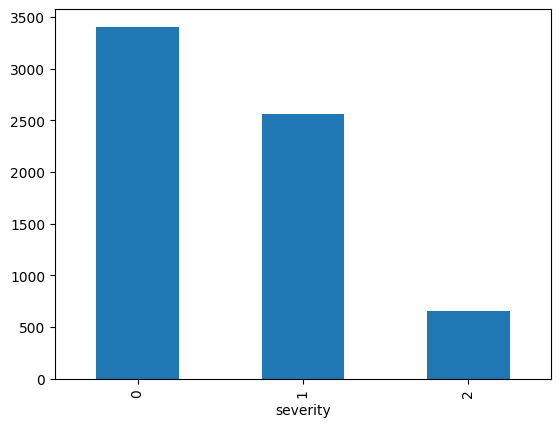

In [154]:
data_e['severity'].value_counts().plot.bar()

In [155]:
num_rows = len(data_e.index)
low_information_cols = [] #

for col in data_e.columns:
    cnts = data_e[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

pedestr: 99.48695%
pedestr
0    6593
1      34
Name: count, dtype: int64

village: 97.51019%
village
0    6462
1     165
Name: count, dtype: int64

red_light: 98.09869%
red_light
0    6501
1     126
Name: count, dtype: int64

fog_snowstorm: 99.59258%
fog_snowstorm
0    6600
1      27
Name: count, dtype: int64



In [157]:
data_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6627 entries, 0 to 6626
Data columns (total 44 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   severity        6627 non-null   int64  
 1   peop_in_car     6627 non-null   int64  
 2   veh_category    6627 non-null   int64  
 3   exp             6627 non-null   float64
 4   child           6627 non-null   int64  
 5   pedestr         6627 non-null   int64  
 6   bump            6627 non-null   int64  
 7   light           6627 non-null   int64  
 8   village         6627 non-null   int64  
 9   city            6627 non-null   int64  
 10  highway         6627 non-null   int64  
 11  gender          6627 non-null   int64  
 12  speed           6627 non-null   int64  
 13  low_distance    6627 non-null   int64  
 14  op_way          6627 non-null   int64  
 15  give_way        6627 non-null   int64  
 16  red_light       6627 non-null   int64  
 17  bad_grip        6627 non-null   i

In [167]:
data_p = data_e.copy()

from sklearn.preprocessing import LabelEncoder

label_encoding_features = ['exp', 'child', 'pedestr', 'bump', 'light', 'highway', 'rwd', 'awd', 'fwd', 'gender', 'speed', 'low_distance', 
                           'op_way', 'give_way', 'bad_grip', 'bad_visibility', 'precip', 'cloudy', 'fog_snowstorm',
                           'houses', 'yard_exit', 'r_roadcross', 'nr_roadcross', 'school', 'village', 'city',
                           'bridge', 'industry', 'mall', 'vehicle_age', 'month', 'd_week', 'weekday', 'time_of_day']

for feature in label_encoding_features:
    data_p[feature] = LabelEncoder().fit_transform(data_p[feature])

In [168]:
data_p['medium'] = np.where(data_p['veh_category'] == 0, 1, 0)
data_p['spacious'] = np.where(data_p['veh_category'] == 1, 1, 0)
data_p['heavy'] = np.where(data_p['veh_category'] == 2, 1, 0)
data_p['small'] = np.where(data_p['veh_category'] == 3, 1, 0)

data_p = data_p.drop('veh_category', axis=1)

In [169]:
data_p['bad_grip'] = data_p['bad_grip'] | data_p['precip']
data_p['bad_grip'] = data_p['bad_grip'] | data_p['cloudy']
# data_p['nr_roadcross'] = data_p['give_way'] | data_p['nr_roadcross']
data_p['bad_visibility'] = data_p['bad_visibility'] | data_p['fog_snowstorm']
data_p = data_p.drop(["precip", 'fog_snowstorm', 'long', 'lat', 'weekday', 'cloudy', 'pedestr', 'bump', 'child', 'light', "low_distance", "school", "week", "village"], axis=1)

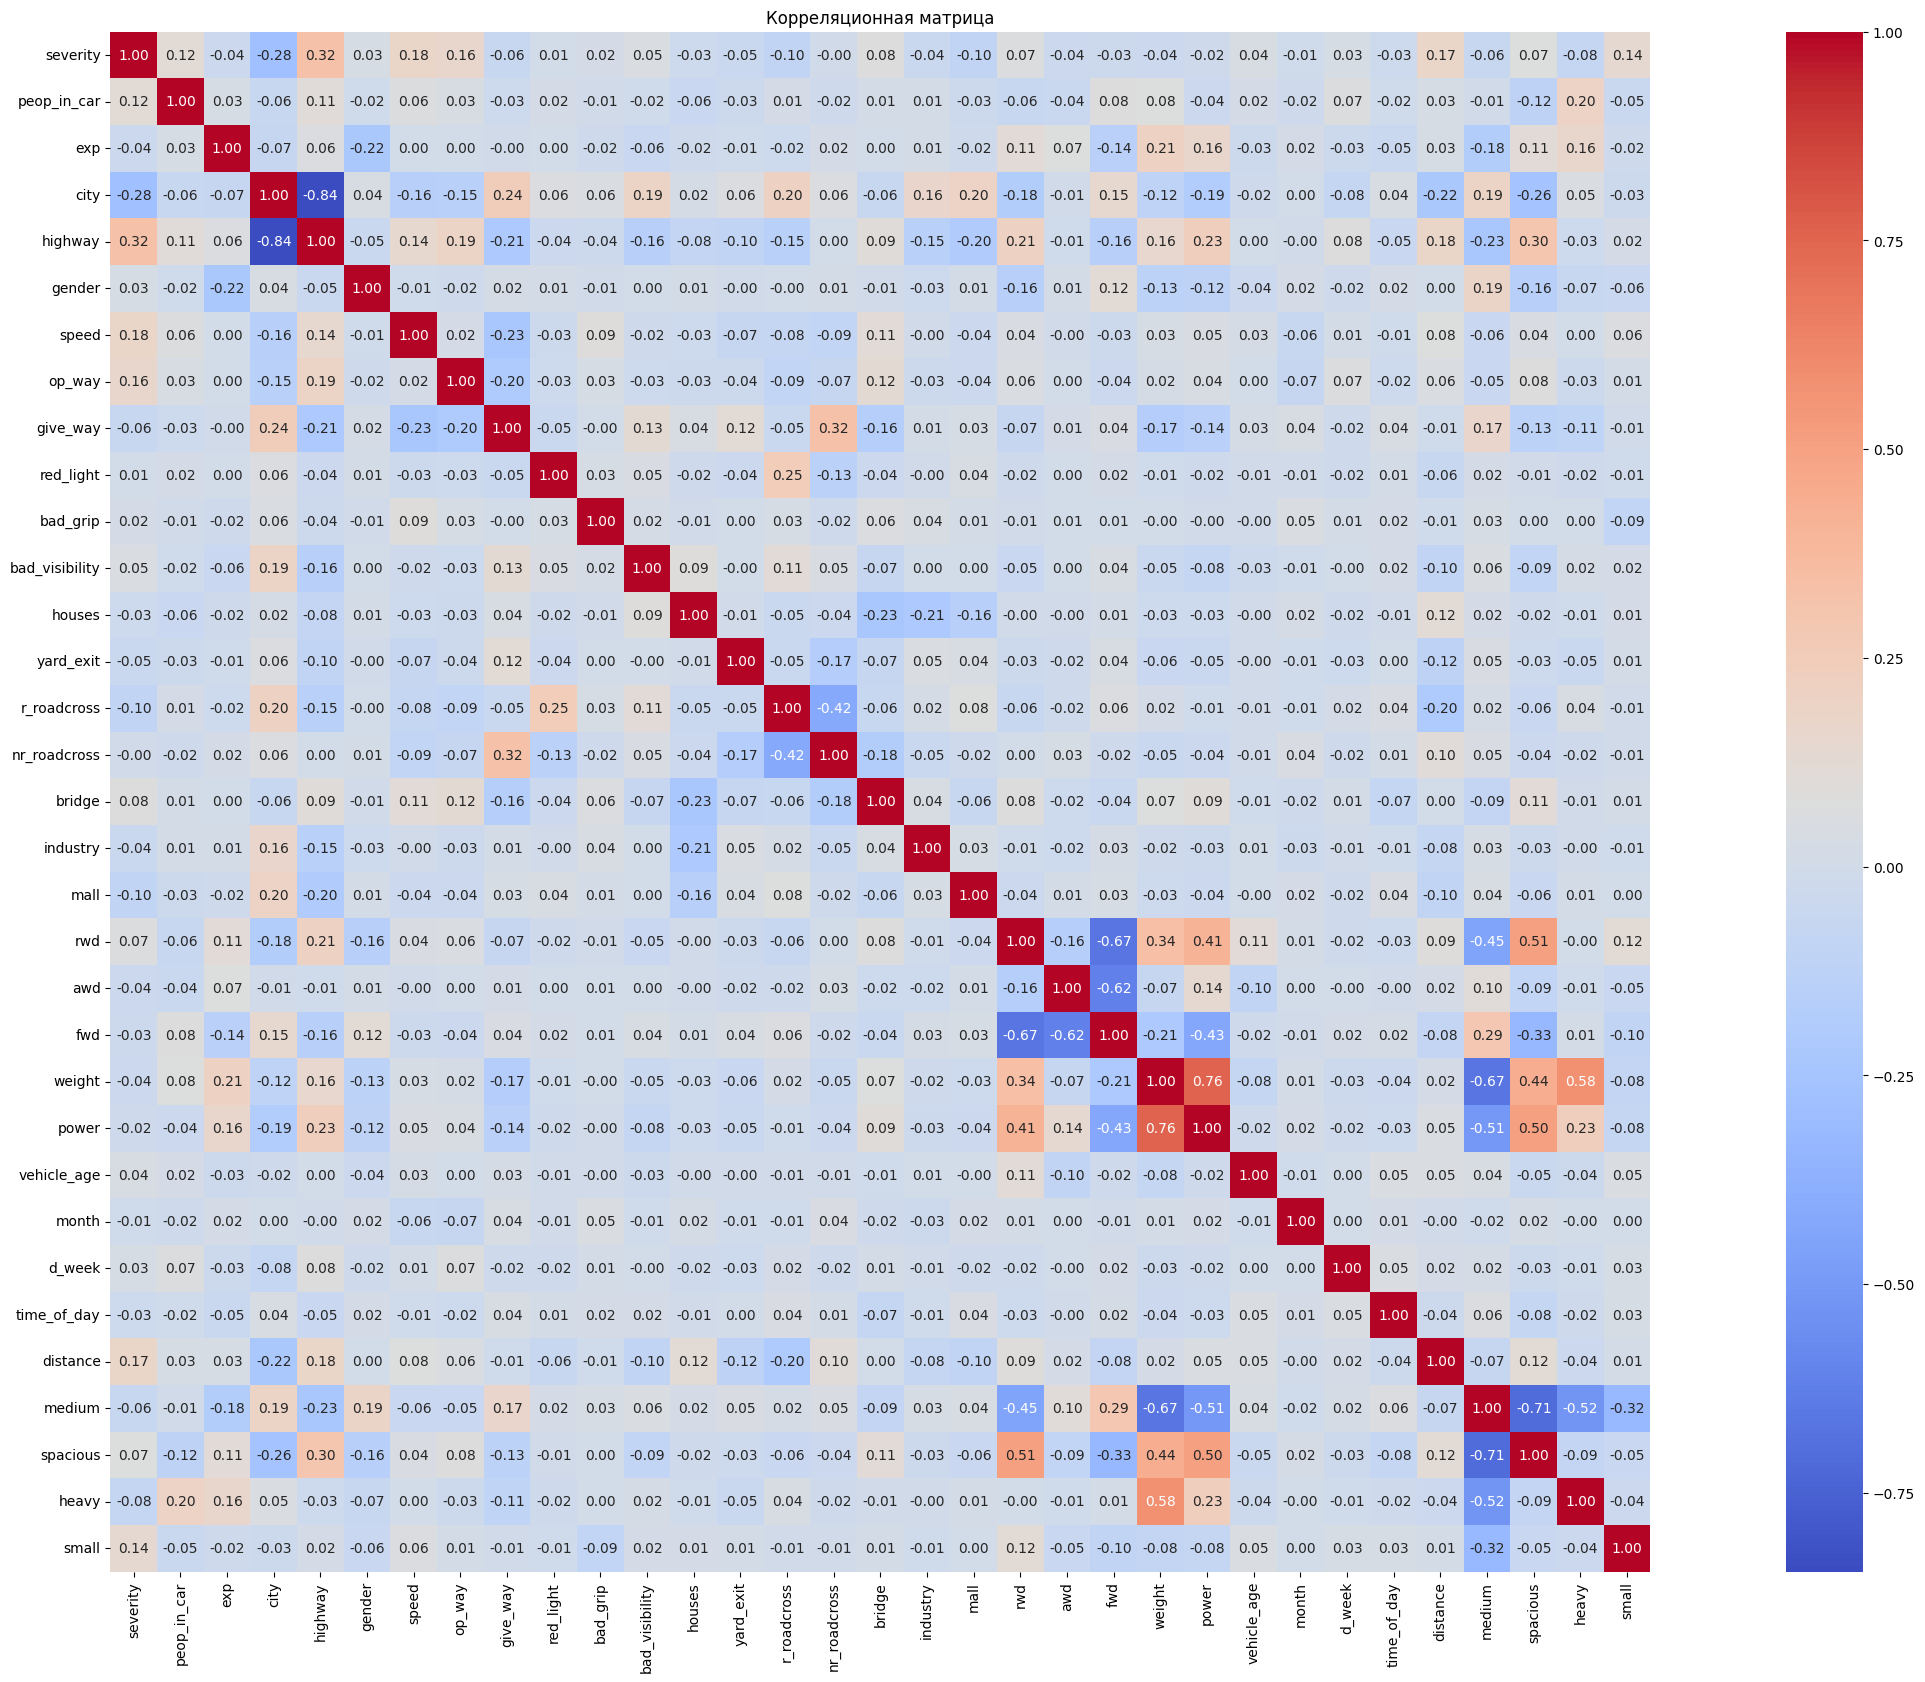

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data_p.corr()
plt.figure(figsize=(35,20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Корреляционная матрица')
plt.show()

In [171]:
data_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6627 entries, 0 to 6626
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   severity        6627 non-null   int64  
 1   peop_in_car     6627 non-null   int64  
 2   exp             6627 non-null   int64  
 3   city            6627 non-null   int64  
 4   highway         6627 non-null   int64  
 5   gender          6627 non-null   int64  
 6   speed           6627 non-null   int64  
 7   op_way          6627 non-null   int64  
 8   give_way        6627 non-null   int64  
 9   red_light       6627 non-null   int64  
 10  bad_grip        6627 non-null   int64  
 11  bad_visibility  6627 non-null   int64  
 12  houses          6627 non-null   int64  
 13  yard_exit       6627 non-null   int64  
 14  r_roadcross     6627 non-null   int64  
 15  nr_roadcross    6627 non-null   int64  
 16  bridge          6627 non-null   int64  
 17  industry        6627 non-null   i

In [172]:
data_p.to_csv('formatted.csv', index=False, encoding='utf-8')